## 一，准备数据

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras import models,layers

dftrain_raw = pd.read_csv('../../../data/titanic/train.csv')
dftest_raw = pd.read_csv('../../../data/titanic/test.csv')
dftrain_raw.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
1,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
2,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
4,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S
5,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
6,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
7,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
8,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
9,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S


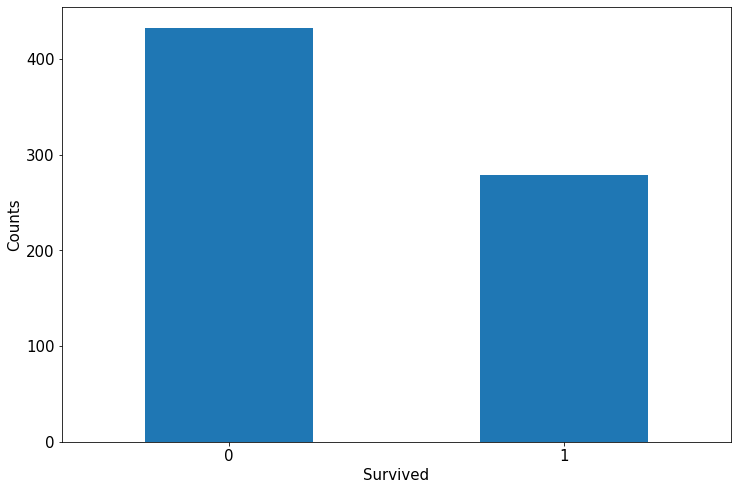

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = dftrain_raw['Survived'].value_counts().plot(kind = 'bar',
     figsize = (12,8),fontsize=15,rot = 0)
ax.set_ylabel('Counts',fontsize = 15)
ax.set_xlabel('Survived',fontsize = 15)
plt.show()

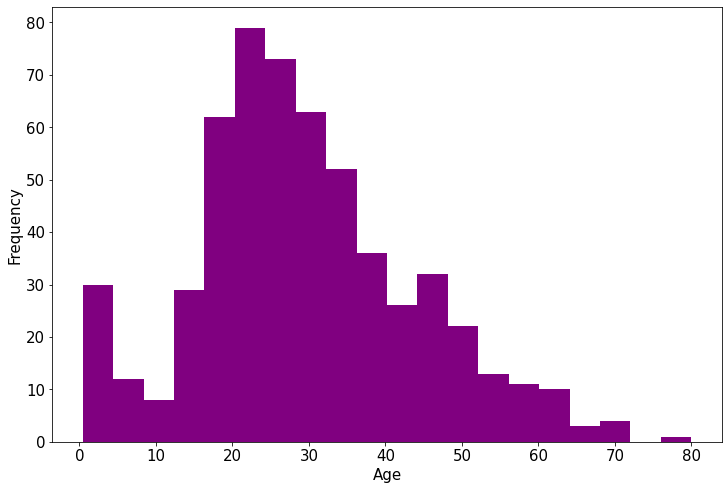

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = dftrain_raw['Age'].plot(kind = 'hist',bins = 20,color= 'purple',
                    figsize = (12,8),fontsize=15)

ax.set_ylabel('Frequency',fontsize = 15)
ax.set_xlabel('Age',fontsize = 15)
plt.show()

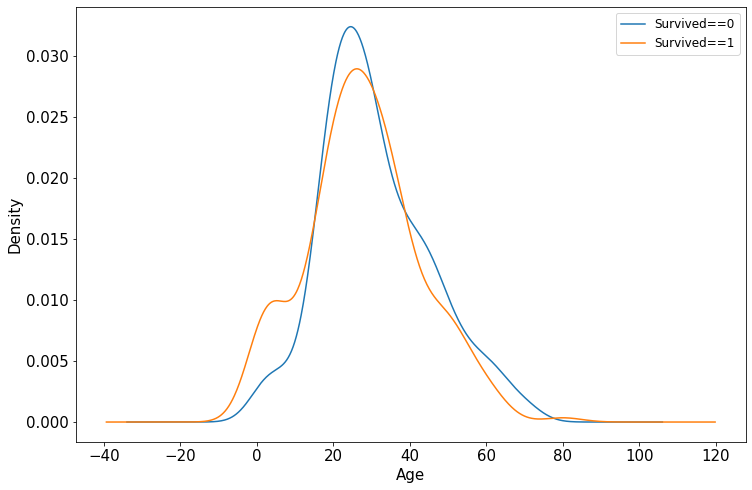

In [12]:
ax = dftrain_raw.query('Survived == 0')['Age'].plot(kind = 'density', 
    figsize = (12, 8), fontsize = 15)
dftrain_raw.query('Survived == 1')['Age'].plot(kind = 'density',
    figsize = (12, 8), fontsize = 15) #不需要再ax=，因为ax就是定义的画布
ax.legend(['Survived==0','Survived==1'],fontsize = 12) #legend可以直接访问查询
ax.set_ylabel('Density',fontsize = 15)
ax.set_xlabel('Age',fontsize = 15)
plt.show()

In [13]:
def preprocessing(dfdata):

    dfresult= pd.DataFrame()

    #Pclass
    dfPclass = pd.get_dummies(dfdata['Pclass'])
    dfPclass.columns = ['Pclass_' +str(x) for x in dfPclass.columns ]
    dfresult = pd.concat([dfresult,dfPclass],axis = 1)

    #Sex
    dfSex = pd.get_dummies(dfdata['Sex'])
    dfresult = pd.concat([dfresult,dfSex],axis = 1)

    #Age
    dfresult['Age'] = dfdata['Age'].fillna(0)
    dfresult['Age_null'] = pd.isna(dfdata['Age']).astype('int32')

    #SibSp,Parch,Fare
    dfresult['SibSp'] = dfdata['SibSp']
    dfresult['Parch'] = dfdata['Parch']
    dfresult['Fare'] = dfdata['Fare']

    #Carbin
    dfresult['Cabin_null'] =  pd.isna(dfdata['Cabin']).astype('int32')

    #Embarked
    dfEmbarked = pd.get_dummies(dfdata['Embarked'],dummy_na=True)
    dfEmbarked.columns = ['Embarked_' + str(x) for x in dfEmbarked.columns]
    dfresult = pd.concat([dfresult,dfEmbarked],axis = 1)

    return(dfresult)

x_train = preprocessing(dftrain_raw)
y_train = dftrain_raw['Survived'].values

x_test = preprocessing(dftest_raw)
y_test = dftest_raw['Survived'].values

print("x_train.shape =", x_train.shape )
print("x_test.shape =", x_test.shape )


x_train.shape = (712, 15)
x_test.shape = (179, 15)


## 二，定义模型

In [11]:
tf.keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Dense(20,activation = 'relu',input_shape=(15,)))
model.add(layers.Dense(10,activation = 'relu' ))
model.add(layers.Dense(1,activation = 'sigmoid' ))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


## 三，训练模型

In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['AUC'])

history = model.fit(x_train, 
                    y_train,
                    batch_size=64,
                    epochs=30,
                    validation_split=0.2)

Train on 569 samples, validate on 143 samples
Epoch 1/30
569/569 [==============================] - 2s 3ms/sample - loss: 1.4992 - AUC: 0.4592 - val_loss: 1.2512 - val_AUC: 0.5075
Epoch 2/30
569/569 [==============================] - 0s 91us/sample - loss: 0.9689 - AUC: 0.5607 - val_loss: 0.9141 - val_AUC: 0.5690
Epoch 3/30
569/569 [==============================] - 0s 84us/sample - loss: 0.7714 - AUC: 0.6155 - val_loss: 0.8181 - val_AUC: 0.6001
Epoch 4/30
569/569 [==============================] - 0s 89us/sample - loss: 0.7391 - AUC: 0.6489 - val_loss: 0.7490 - val_AUC: 0.6434
Epoch 5/30
569/569 [==============================] - 0s 86us/sample - loss: 0.7227 - AUC: 0.6495 - val_loss: 0.7322 - val_AUC: 0.6340
Epoch 6/30
569/569 [==============================] - 0s 88us/sample - loss: 0.6810 - AUC: 0.6555 - val_loss: 0.6965 - val_AUC: 0.6382
Epoch 7/30
569/569 [==============================] - 0s 131us/sample - loss: 0.6577 - AUC: 0.6573 - val_loss: 0.6881 - val_AUC: 0.6286
Epoch 8/3

## 四，评估模型

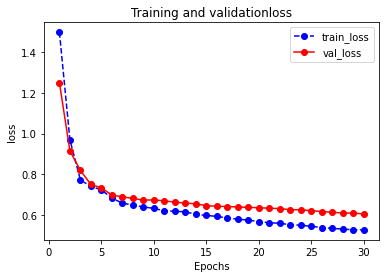

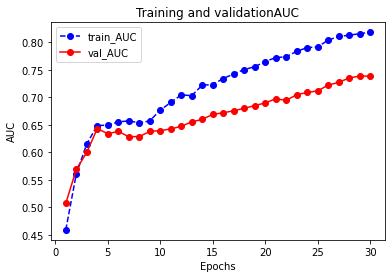

179/179 [==============================] - 0s 178us/sample - loss: 0.5427 - AUC: 0.7949


[0.5426975984813115, 0.79488236]

In [15]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_' + metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-') 
    plt.title('Training and validation' + metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()   

plot_metric(history, 'loss')   

plot_metric(history, 'AUC')

model.evaluate(x = x_test, y = y_test) #在测试集上的评价，loss和AUC

## 五，使用模型

In [16]:
model.predict(x_test[:10])

model.predict_classes(x_test[:10])

array([[1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0]])

## 六，保存模型

In [18]:
##1，Keras方式保存，仅兼容python
##H5 格式文件保存的是： Model stucture 和 Model weights
##JSON 和 YAML 格式问价保存的是： Model stucture
##保存模型
model.save('./keras_model.h5')
del model

##加载模型
model = models.load_model('./keras_model.h5')
model.evaluate(x_test, y_test)

##保存模型结构
json_str = model.to_json()
model_json = models.model_from_json(json_str)

##保存权重
model.save_weights('./keras_model_weight.h5')

##加载模型结构
model_json = models.model_from_json(json_str)
model_json.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['AUC'])

##加载模型权重
model_json .load_weights('./keras_model_weight.h5')
model_json.evaluate(x_test, y_test)

##2，Tensorflow原生方式
model.save_weights('./tf_model_weights.ckpt',
    save_format='tf')

model.save('./tf_model_savedmodel',
    save_format='tf')
print('export saved model.')

model_loaded = tf.keras.models.load_model('./tf_model_savedmodel')
model_loaded.evaluate(x_test, y_test)

179/179 [==============================] - 0s 1ms/sample - loss: 0.5427 - AUC: 0.7949
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./tf_model_savedmodel\assets
export saved model.
179/179 [==============================] - 0s 1ms/sample - loss: 0.5427 - AUC: 0.7949


[0.5426973983562192, 0.79488236]